### 円周率の計算をモンテカルロ法でやってみる

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact
%matplotlib inline

In [39]:
plt.style.use("ggplot")
np.random.seed(123)

In [6]:
NMC = 100
xmc = np.random.rand(NMC)
ymc = np.random.rand(NMC)
r = (xmc**2+ymc**2)**0.5
accept = np.where(r<=1, 1, 0)
accept_ratio = np.sum(accept)/NMC
accept_ratio

0.82

In [32]:
NMC = 10000
xmc = np.random.rand(NMC)
ymc = np.random.rand(NMC)
@interact(mcs=(0,NMC,1))
def animation(mcs=0):
    plt.figure(figsize=(6,6))
    plt.xlim([0,1])
    plt.ylim([0,1])
    x = np.arange(0,1,0.001)
    y = (1 -x**2)**0.5
    y2 = np.ones(x.shape[0])
    plt.plot(x,y)
    plt.fill_between(x, y, alpha=0.3)
    plt.fill_between(x, y, y2, alpha=0.3)
    r = (xmc[:mcs]**2+ymc[:mcs]**2)**0.5
    accept = np.where(r<=1, 1, 0)
    accept_ratio = np.sum(accept)/(len(xmc[:mcs])+1)
    plt.scatter(xmc[:mcs],  ymc[:mcs], color = 'black', marker=".")
    plt.show()
    print("Monte Carlo: ", accept_ratio)
    print("Analytical Solution: ", np.pi / 4.0)

interactive(children=(IntSlider(value=0, description='mcs', max=10000), Output()), _dom_classes=('widget-inter…

In [33]:
pi_mcs = []
for mcs in range(1, NMC):
    r = (xmc[:mcs]**2+ymc[:mcs]**2)**0.5
    accept = np.where(r<=1, 1, 0)
    accept_ratio = np.sum(accept)/mcs
    pi_mcs.append(accept_ratio)

In [34]:
pi_x = np.arange(len(pi_mcs))+1

Text(0, 0.5, 'accept ratio')

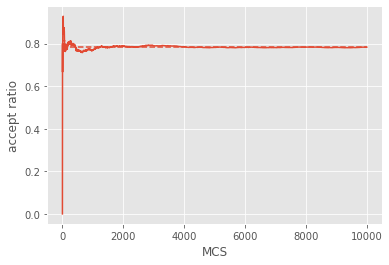

In [35]:
plt.plot(pi_x, pi_mcs)
plt.hlines(0.785, pi_x[0], pi_x[-1], linestyles="dashed")
plt.xlabel("MCS")
plt.ylabel("accept ratio")

### 棄却サンプリング

In [36]:
from scipy import stats
from scipy import optimize as opt
from scipy.stats import beta, uniform

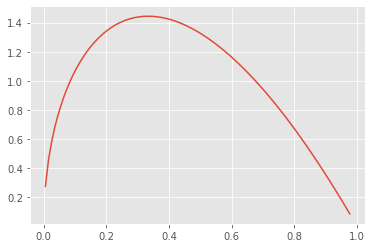

In [45]:
a, b = 1.5, 2.0
x = np.linspace(beta.ppf(0.001, a, b), beta.ppf(0.999, a, b), 100)
plt.plot(x, beta.pdf(x, a, b))

In [46]:
f = beta(a=a, b=b).pdf
res = opt.fmin(lambda x:-f(x), 0.3)
y_max = f(res)

Optimization terminated successfully.
         Current function value: -1.443376
         Iterations: 10
         Function evaluations: 20


In [47]:
y_max

array([1.44337567])

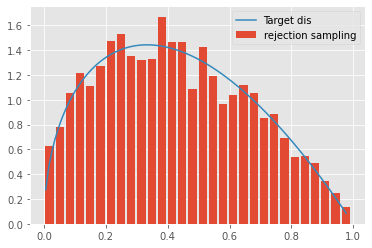

In [57]:
NMCS = 5000
x_mcs = uniform.rvs(size=NMCS)
r = uniform.rvs(size=NMCS)*y_max
accept = x_mcs[r <= f(x_mcs)]
plt.hist(accept, density=True, bins=30, rwidth=0.8, label="rejection sampling")
x = np.linspace(beta.ppf(0.001, a, b), beta.ppf(0.999, a, b), 100)
plt.plot(x, beta.pdf(x, a, b), label="Target dis")
plt.legend()

In [53]:
x_mcs

array([0.89401513, 0.48788606, 0.45711958, ..., 0.72601283, 0.71243578,
       0.78555374])

In [55]:
len(r)

5000